In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("darkgrid")

In [67]:
df = pd.read_csv("bollywood.csv", parse_dates=["Release Date",'ReleaseTime'])
df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [68]:
print(df.shape[0] * df.shape[1])
df.info()

1490
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 10.0+ KB


In [69]:
movie_genre = df.groupby("Genre").size().reset_index().sort_values(0,ascending=False)
movie_genre = movie_genre.rename(columns={0:"Number"})
movie_genre

,Genre,Number
3,Comedy,36
0,Drama,35
5,Thriller,26
4,Romance,25
1,Action,21
2,Action,3
6,Thriller,3


In [70]:
pd.crosstab(df["Genre"],df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

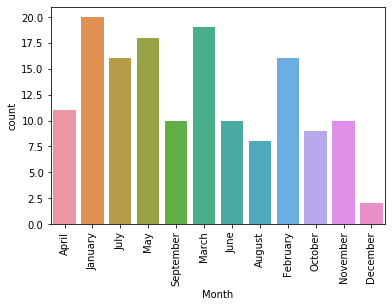

In [92]:
df['Month'] = df['Release Date'].dt.month_name()
sns.countplot(df["Month"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

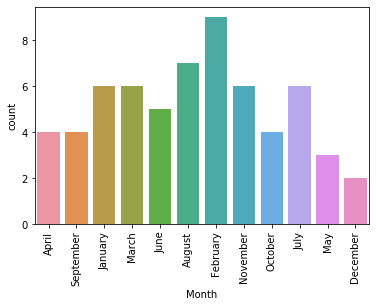

In [96]:
sns.countplot(df[df["Budget"] > 25]["Month"])
plt.xticks(rotation=90)

In [97]:
df[df["Budget"] > 25]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,2014-04-18,2 States,LW,Romance,36,104.0,8576361,26622,2527,April
6,7,2014-09-19,Daawat-E-Ishq,N,Comedy,30,24.6,3905050,8315,1373,September
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.0,2435283,4326,647,January
8,9,2014-01-10,Dedh Ishqiya,LW,Comedy,31,27.0,2333067,2436,591,January
10,11,2014-03-28,Dishkiyaoon,N,Action,28,6.0,2397647,3308,465,March
...,...,...,...,...,...,...,...,...,...,...,...
138,139,2015-01-23,Baby,N,Action,60,125.0,7968156,29246,2426,January
141,142,2015-02-06,Shamitabh,N,Drama,40,38.0,2105508,5599,677,February
142,143,2015-02-13,Roy,FS,Romance,40,58.0,7687797,18974,3229,February
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.0,2316047,4289,807,March


In [104]:
df["ROI"] = (df['BoxOfficeCollection']-df["Budget"])/df["Budget"]
df[['MovieName',"ROI"]].sort_values("ROI",ascending=False)[0:10]

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


  ReleaseTime   Average
0          FS  0.973853
1          HS  0.850867
2          LW  1.127205
3           N  0.657722


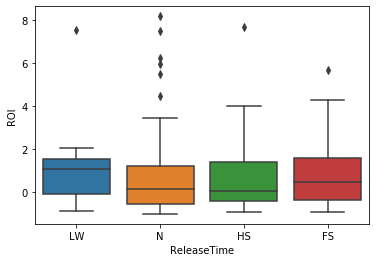

In [115]:
sns.boxplot(x="ReleaseTime",y="ROI",data=df)
print(df.groupby("ReleaseTime")["ROI"].mean().rename("Average").reset_index())

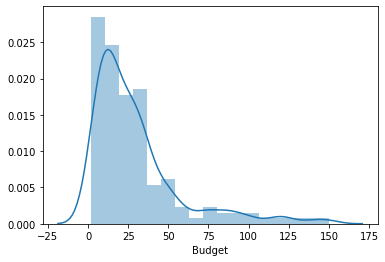

In [116]:
sns.distplot(df["Budget"])

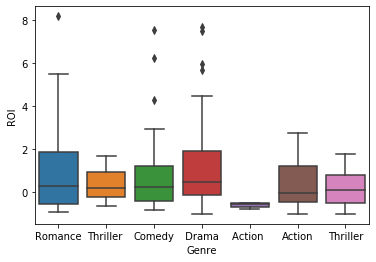

In [121]:
sns.boxplot(y = df["ROI"],
            x = df["Genre"])

In [130]:
df["YoutubeLikes"].corr(df["BoxOfficeCollection"])

0.6825165877731295

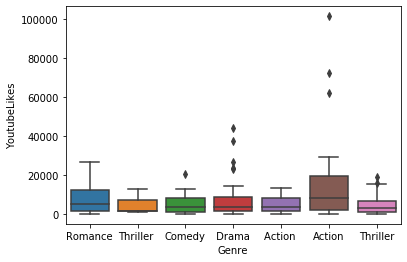

In [132]:
sns.boxplot(x = df["Genre"],
            y = df["YoutubeLikes"])

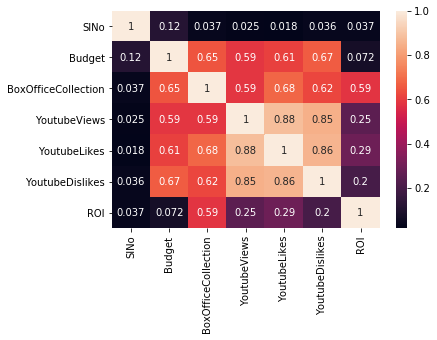

In [133]:
sns.heatmap(df.corr(),annot=True)